In [343]:
import random
import matplotlib.pyplot as plt

def tabooSearch(MAX_ITERATION, generateNeighbor, current, computeCost, EdgeCost, neighborlength, tenurlength, tabooCriteria, checktaboo):
    tabooList = [0,0,0,0,0,0,0,0]
    best_cost = computeCost(current, EdgeCost)
    current_graph = current
    cost_history =[]

    for CURRENT_ITERATION in range(MAX_ITERATION):
        cost_history.append(best_cost)
        neighbor = generateNeighbor(current, isgraphValid, neighborlength)  #return set of neighbors
        neighbor.sort(key = lambda x: computeCost(x, EdgeCost), reverse = False)

        for graph in neighbor:
            tabookey = tabooCriteria(current_graph, graph)
            
            #print("---")
            #print(f"Current iteration {CURRENT_ITERATION}")
            #print(f"Taboo list {tabooList}")
            #print(f"{current_graph} vs {graph} ")
            #print(f"taboomove {CURRENT_ITERATION <tabooList[tabookey]}   value {computeCost(current_graph, EdgeCost)} vs {computeCost(graph, EdgeCost)}  currentbest {best_cost}")
            #print("tabookey ", tabookey)

            if checktaboo(tabooList, CURRENT_ITERATION, current_graph, graph) : #is taboo

                if(computeCost(graph, EdgeCost) < best_cost):
                    current_graph = graph
                    
                    break
            else:
                current_graph = graph
                tabooList[tabookey] = CURRENT_ITERATION + tenurlength
                break



        if best_cost > computeCost(current_graph, EdgeCost):
            best_cost = computeCost(current_graph, EdgeCost)

        
    return cost_history

def computeEdgeCost(ConnectedEdge, EdgeCost):
    sum = 0

    for index in range(len(EdgeCost)):
        if ConnectedEdge[index] == 1:
            sum += EdgeCost[index]
            
    if ConnectedEdge[2] + ConnectedEdge[6] + ConnectedEdge[7] >1 :
        sum+= 100
    if ConnectedEdge[7] >ConnectedEdge[5]:
        sum+= 100

    return sum
def generateNeighbor(ConnectedEdge, isgraphValid, neighborlength):
    Zeroindex = []
    Nonzeroindex = []
    NeighborARR = []
    for i in range(len(ConnectedEdge)):
        if(ConnectedEdge[i] == 1):
            Nonzeroindex.append(i)
        else:
            Zeroindex.append(i)
    
    while(len(NeighborARR) < neighborlength):
        tempcurrentConnectedEdge = ConnectedEdge.copy()
        
        #randomly flip bit 
        flipZeroLocation = Zeroindex[random.randint(0, len(Zeroindex)-1)]
        flipOneLocatoin  = Nonzeroindex[random.randint(0, len(Nonzeroindex)-1)]
        tempcurrentConnectedEdge[flipZeroLocation] = 1
        tempcurrentConnectedEdge[flipOneLocatoin] = 0
        
        if isgraphValid(tempcurrentConnectedEdge):
            NeighborARR.append(tempcurrentConnectedEdge)
        else:
            continue
    
    return NeighborARR
def isgraphValid(current):
    Gset = set()
    if current[0] == 1:
        Gset.add(1)
        Gset.add(2)
    if current[1] == 1:
        Gset.add(1)
        Gset.add(3)
    if current[2] == 1:
        Gset.add(1)
        Gset.add(4)
    if current[3] == 1:
        Gset.add(2)
        Gset.add(3)
    if current[4] == 1:
        Gset.add(3)
        Gset.add(4)
    if current[5] == 1:
        Gset.add(2)
        Gset.add(5)
    if current[6] == 1:
        Gset.add(3)
        Gset.add(5)
    if current[7] == 1:
        Gset.add(4)
        Gset.add(5)

    return len(Gset) == 5
def consctructPath():

    arr = [0, 0, 1, 1, 1, 1, 0, 0]
    random.shuffle(arr)
    while(isgraphValid(arr) == False):
        random.shuffle(arr)
    return arr

def checktabooForRecentlyAddedEdge(tabooList, currentIteration, current, next):
    loc = RecentlyRemovedScan(current, next)
    if currentIteration < tabooList[loc]:
        True
    else:
        False

def checktabooForRecentlyRemovedEdge(tabooList, currentIteration, current, next):
    loc = RecentlyAddedScan(current, next)
    if currentIteration < tabooList[loc]:
        True
    else:
        False


def RecentlyAddedScan(currentGraph, nextGraph):
    for i in range(len(currentGraph)):
        if(currentGraph[i] == 0   and nextGraph[i]  == 1):
            return i 
    return 0

def RecentlyRemovedScan(currentGraph, nextGraph):
    for i in range(len(currentGraph)):
        if(currentGraph[i] == 1   and nextGraph[i]  == 0):
            return i
    return 0

def getAvg(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList

def runSimulationP1(TRIAL, ITERATION, Neighborsize, Tenurlen, Policy, tabooCondition):
    trialsOfIteration = []
    for i in range(TRIAL):
        random.seed(i)
        
        start = consctructPath()
        trialsOfIteration.append(tabooSearch(ITERATION, generateNeighbor, start, computeEdgeCost, [13,7,9,1,3,19,10,7], Neighborsize, Tenurlen, Policy, tabooCondition ))
    avg = getAvg(trialsOfIteration)
    print("setting: "+ "NBsize, TNeurlen: " + str(Neighborsize) + " " + str(Tenurlen))
    print("Minimum: " + str(getMinimum(trialsOfIteration)))
    print("Average: " + str(avg[len(avg) - 1]))
    plt.plot(range(0,ITERATION), avg, label = "Tenur: " + str(Tenurlen) + " Neighborsize: "+str(Neighborsize ) )

def getMinimum(ListofList):
    minnest = 99999999
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] < minnest:
            minnest = ListofList[i][len(ListofList[0])-1]
            
    return minnest

setting: NBsize, TNeurlen: 4 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 6 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 7 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 8 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 9 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 4 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 6 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 7 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 8 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 9 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 4 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 1
Minimum: 21
Average: 36.36666666666667
setting: NBsiz

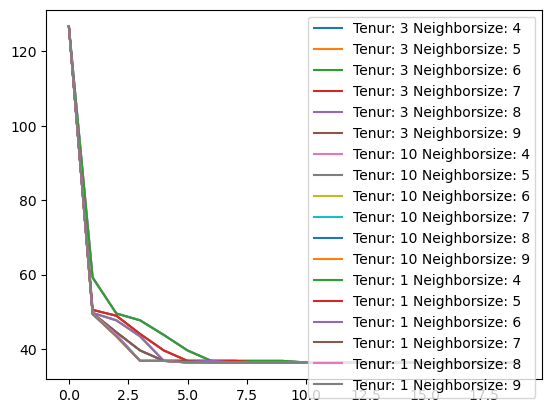

In [341]:
cost = [13,7,9,1,3,19,10,7]

runSimulationP1(30, 20, 4, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 5, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 6, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 7, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 8, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 9, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)

plt.legend()
plt.show()


runSimulationP1(30, 20, 4, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 5, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 6, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 7, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 8, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 9, 10, RecentlyAddedScan, checktabooForRecentlyAddedEdge)

plt.legend()
plt.show()


runSimulationP1(30, 20, 4, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 5, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 6, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 7, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 8, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP1(30, 20, 9, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)

plt.legend()
plt.show()


#Problem 1


setting: NBsize, TNeurlen: 4 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 6 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 7 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 8 3
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 9 3
Minimum: 21
Average: 36.36666666666667


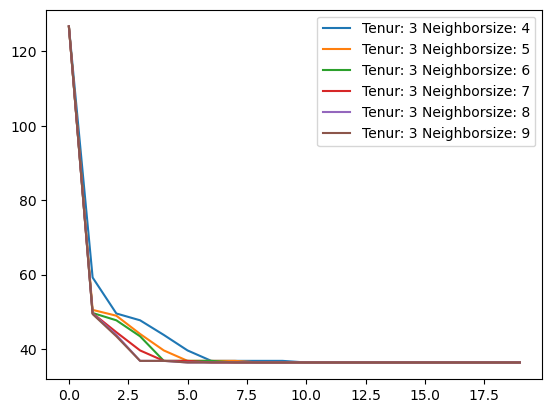

setting: NBsize, TNeurlen: 4 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 6 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 7 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 8 10
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 9 10
Minimum: 21
Average: 36.36666666666667


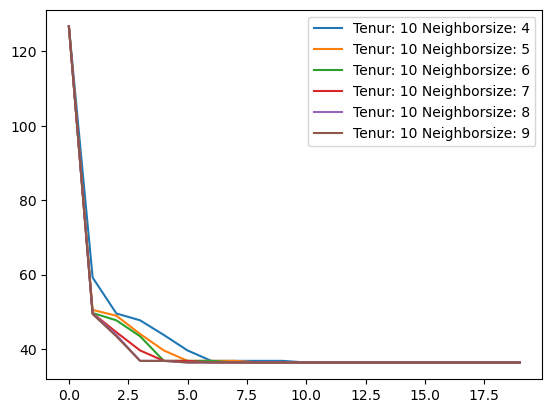

setting: NBsize, TNeurlen: 4 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 5 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 6 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 7 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 8 1
Minimum: 21
Average: 36.36666666666667
setting: NBsize, TNeurlen: 9 1
Minimum: 21
Average: 36.36666666666667


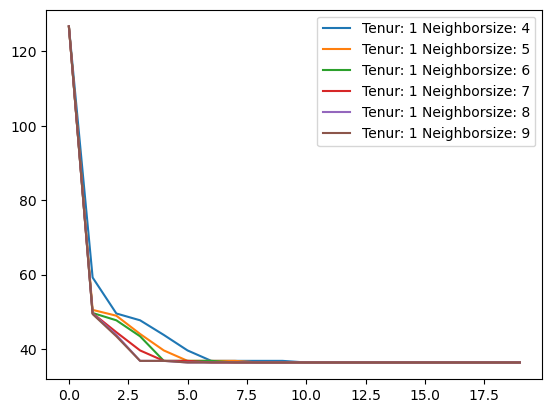

In [344]:
cost = [13, 7, 9, 1, 3, 19, 10, 7]
start = [0, 0, 1, 1, 1, 0, 0, 1]

computeEdgeCost(start, cost)

runSimulationP1(30, 20, 4, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 5, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 6, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 7, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 8, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 9, 3, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)

plt.legend()
plt.show()


runSimulationP1(30, 20, 4, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 5, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 6, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 7, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 8, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 9, 10, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)

plt.legend()
plt.show()


runSimulationP1(30, 20, 4, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 5, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 6, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 7, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 8, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)
runSimulationP1(30, 20, 9, 1, RecentlyRemovedScan, checktabooForRecentlyRemovedEdge)

plt.legend()
plt.show()

setting: NBsize, TNeurlen: 1 3
Minimum: 64
Average: 70.45
setting: NBsize, TNeurlen: 2 3
Minimum: 64
Average: 69.42
setting: NBsize, TNeurlen: 3 3
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 4 3
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 5 3
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 6 3
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 7 3
Minimum: 64
Average: 69.33


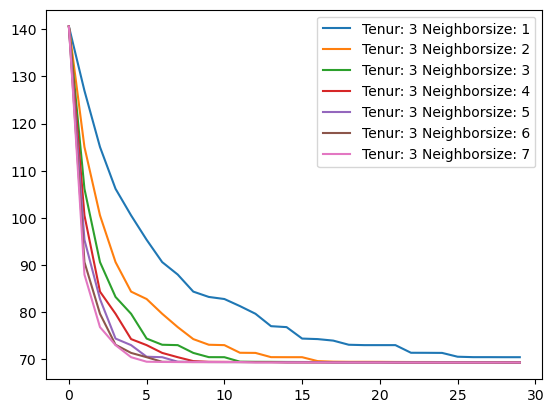

setting: NBsize, TNeurlen: 1 1
Minimum: 64
Average: 70.45
setting: NBsize, TNeurlen: 2 1
Minimum: 64
Average: 69.42
setting: NBsize, TNeurlen: 3 1
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 4 1
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 5 1
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 6 1
Minimum: 64
Average: 69.33
setting: NBsize, TNeurlen: 7 1
Minimum: 64
Average: 69.33


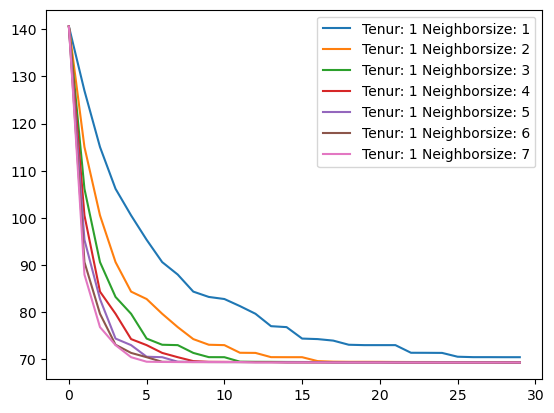

In [371]:
def tabooSearch2(MAX_ITERATION, generateNeighbor, current, computeCost, EdgeCost, neighborlength, tenurlength, tabooCriteria, checktaboo):
    tabooList = [0,0,0,0,0,0,0,0,0]
    best_cost = computeCost(current, EdgeCost)
    current_graph = current
    cost_history =[]

    for CURRENT_ITERATION in range(MAX_ITERATION):
        cost_history.append(best_cost)
        neighbor = generateNeighbor(current, isgraphValid2, neighborlength)  #return set of neighbors
        neighbor.sort(key = lambda x: computeCost(x, EdgeCost), reverse = False)

        for graph in neighbor:
            tabookey = tabooCriteria(current_graph, graph)
            
            #print("---")
            #print(f"Current iteration {CURRENT_ITERATION}")
            #print(f"Taboo list {tabooList}")
            #print(f"{current_graph} vs {graph} ")
            #print(f"taboomove {CURRENT_ITERATION <tabooList[tabookey]}   value {computeCost(current_graph, EdgeCost)} vs {computeCost(graph, EdgeCost)}  currentbest {best_cost}")
            #print("tabookey ", tabookey)

            if checktaboo(tabooList, CURRENT_ITERATION, current_graph, graph) : #is taboo

                if(computeCost(graph, EdgeCost) < best_cost):
                    current_graph = graph
                    
                    break
            else:
                current_graph = graph
                tabooList[tabookey] = CURRENT_ITERATION + tenurlength
                break



        if best_cost > computeCost(current_graph, EdgeCost):
            
            best_cost = computeCost(current_graph, EdgeCost)

        
    return cost_history

def runSimulationP2(TRIAL, ITERATION, Neighborsize, Tenurlen, Policy, tabooCondition):
    trialsOfIteration = []
    for i in range(TRIAL):
        random.seed(i)
        
        start = consctructPath2()
        trialsOfIteration.append(tabooSearch2(ITERATION, generateNeighbor2, start, computeEdgeCost2, [20,18,19,18,9,8,10,17,29], Neighborsize, Tenurlen, Policy, tabooCondition ))
    avg = getAvg(trialsOfIteration)
    print("setting: "+ "NBsize, TNeurlen: " + str(Neighborsize) + " " + str(Tenurlen))
    print("Minimum: " + str(getMinimum(trialsOfIteration)))
    print("Average: " + str(avg[len(avg) - 1]))
    plt.plot(range(0,ITERATION), avg, label = "Tenur: " + str(Tenurlen) + " Neighborsize: "+str(Neighborsize ) )

def getMinimum(ListofList):
    minnest = 99999999
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] < minnest:
            minnest = ListofList[i][len(ListofList[0])-1]
            
    return minnest

def generateNeighbor2(ConnectedEdge, isgraphValid, neighborlength):
    Zeroindex = []
    Nonzeroindex = []
    NeighborARR = []
    for i in range(len(ConnectedEdge)):
        if(ConnectedEdge[i] == 1):
            Nonzeroindex.append(i)
        else:
            Zeroindex.append(i)
    
    while(len(NeighborARR) < neighborlength):
        tempcurrentConnectedEdge = ConnectedEdge.copy()
        
        #randomly flip bit 
        flipZeroLocation = Zeroindex[random.randint(0, len(Zeroindex)-1)]
        flipOneLocatoin  = Nonzeroindex[random.randint(0, len(Nonzeroindex)-1)]
        tempcurrentConnectedEdge[flipZeroLocation] = 1
        tempcurrentConnectedEdge[flipOneLocatoin] = 0
        
        if isgraphValid(tempcurrentConnectedEdge):
            NeighborARR.append(tempcurrentConnectedEdge)
        else:
            continue
    
    return NeighborARR
def isgraphValid2(current):
    Gset = set()
    if current[0] == 1:
        Gset.add(1)
        Gset.add(2)
    if current[1] == 1:
        Gset.add(1)
        Gset.add(3)
    if current[2] == 1:
        Gset.add(1)
        Gset.add(4)
    if current[3] == 1:
        Gset.add(2)
        Gset.add(3)
    if current[4] == 1:
        Gset.add(3)
        Gset.add(4)
    if current[5] == 1:
        Gset.add(2)
        Gset.add(5)
    if current[6] == 1:
        Gset.add(3)
        Gset.add(5)
    if current[7] == 1:
        Gset.add(4)
        Gset.add(5)
    if current[8] == 1:
        Gset.add(4)
        Gset.add(5)
    return len(Gset) == 5

def consctructPath2():
    arr = [1,0,0,0,1,1,0,1,0]
    random.shuffle(arr)
    while(isgraphValid2(arr) == False):
        random.shuffle(arr)
    return arr

def computeEdgeCost2(ConnectedEdge, EdgeCost):
    sum = 0

    for index in range(len(EdgeCost)):
        if ConnectedEdge[index] == 1:
            sum += EdgeCost[index]
            
    if ConnectedEdge[4] + ConnectedEdge[5]  >  2 * ConnectedEdge[8] :
        sum+= 100
    if ConnectedEdge[6] > ConnectedEdge[5]:
        sum+= 100

    return sum

runSimulationP2(100, 30, 1, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 2, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 3, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 4, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 5, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 6, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 7, 3, RecentlyAddedScan, checktabooForRecentlyAddedEdge)

plt.legend()
plt.show()

runSimulationP2(100, 30, 1,1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 2, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 3, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 4, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 5, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 6, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)
runSimulationP2(100, 30, 7, 1, RecentlyAddedScan, checktabooForRecentlyAddedEdge)

plt.legend()
plt.show()

setting: NBsize, TNeurlen: 3 4
Minimum: 53
Average: 55.6
setting: NBsize, TNeurlen: 3 4
Minimum: 54
Average: 56.1
setting: NBsize, TNeurlen: 3 4
Minimum: 53
Average: 55.8


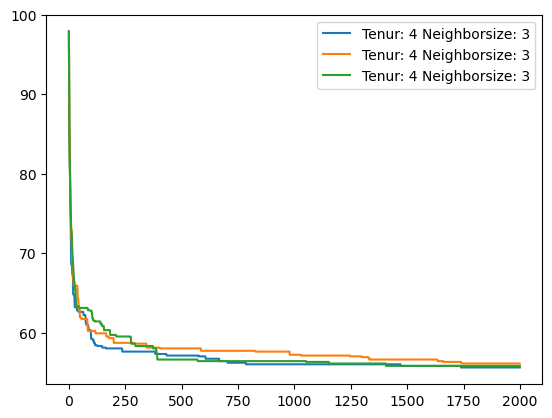

In [36]:
import random
import matplotlib.pyplot as plt
def computeString (list):
    def find(key):
        for i in range(len(list)):
            if(list[i] == key):
                return i
    def calcXY(i):
        
        return (((i-1)%3), (i-1)//3)
    def calcWeight(t1,t2):
        return abs(t2[0]-t1[0]) + abs(t2[1]-t1[1])
    
    
    cur =[]
    weight = [3,1,1,4,2,3,7,4,6,7,8]
    cur.append(calcWeight(calcXY(find("a")), calcXY(find("d"))))
    cur.append(calcWeight(calcXY(find("a")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("d")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("b")), calcXY(find("c"))))
    cur.append(calcWeight(calcXY(find("d")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("c")), calcXY(find("i"))))
    cur.append(calcWeight(calcXY(find("c")), calcXY(find("e"))))
    cur.append(calcWeight(calcXY(find("i")), calcXY(find("f"))))
    cur.append(calcWeight(calcXY(find("e")), calcXY(find("f"))))
    cur.append(calcWeight(calcXY(find("f")), calcXY(find("g"))))
    cur.append(calcWeight(calcXY(find("f")), calcXY(find("h"))))
    
    sum = 0
    for i in range(len(cur)):
        sum+= cur[i] * weight[i]
    return sum


def geneighbor(list, neighborlength):
    ret_list = []
    while len(ret_list) < neighborlength:
        pointa = random.randint(0, len(list)-1)
        pointb= random.randint(0, len(list)-1)
        while(pointa == pointb):
            pointb= random.randint(0, len(list)-1)

        temp_list = list.copy()
        
        temp_val =  temp_list[pointa]
        temp_list[pointa] = temp_list[pointb]
        temp_list[pointb] = temp_val

        ret_list.append(temp_list)
    return ret_list

def findupdate(current, next):
    ret = []
    for i in range(len(current)):
        if(current[i] != next[i]):
            ret.append(i)
    ret.sort()
    return ret

def updatetabooLASTSWAP(tabooList, current, next, tenurLength):
    tup = findupdate(current, next)
    tabooList[tup[0]][tup[1]] = tenurLength


def checktaboo(tabooList, current, next):
    tup = findupdate(current, next)
    
    return tabooList[tup[0]][tup[1]] != 0 

def tabooSearchGraph(MAX_ITERATION, generateNeighbor, current, computeCost, neighborlength, tenurlength, checktaboo, updatetaboo):
    tabooList = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]
    best_cost = computeCost(current)
    current_graph = current
    cost_history =[]

    for CURRENT_ITERATION in range(MAX_ITERATION):
        cost_history.append(best_cost)

        neighbor = generateNeighbor(current_graph, neighborlength)  #return set of neighbors
        neighbor.sort(key = lambda x: computeCost(x), reverse = False)
        
        for graph in neighbor:
            
            
            #print("---")
            #print(f"Current iteration {CURRENT_ITERATION}")
            #print(f"Taboo list {tabooList}")
            #print(f"{current_graph} vs {graph} ")
            #print(f"taboomove {CURRENT_ITERATION <tabooList[tabookey]}   value {computeCost(current_graph, EdgeCost)} vs {computeCost(graph, EdgeCost)}  currentbest {best_cost}")
            #print("tabookey ", tabookey)

            if checktaboo(tabooList, current_graph, graph) : #is taboo
                if(computeCost(graph) < best_cost):
                    current_graph = graph
                    break
            else:
                updatetaboo(tabooList, current_graph, graph, tenurlength)
                current_graph = graph
                break

        for row in range(len(tabooList)):
            for col in range(row + 1 , len(tabooList[0])):
                if tabooList[row][col] != 0:
                    tabooList[row][col] = tabooList[row][col] - 1

        if best_cost > computeCost(current_graph):
            
            best_cost = computeCost(current_graph)

        
    return cost_history
def constructpathString():
    start  = list("xaghcbidef")
    random.shuffle(start)
    return start


def tabooSearchGraphONEOF(MAX_ITERATION, generateNeighbor, current, computeCost, neighborlength, tenurlength, zeroOrFirst):
    tabooList = [0,0,0,0,0,0,0,0,0,0]
    best_cost = computeCost(current)
    current_graph = current
    cost_history =[]

    for CURRENT_ITERATION in range(MAX_ITERATION):
        cost_history.append(best_cost)

        neighbor = generateNeighbor(current_graph, neighborlength)  #return set of neighbors
        neighbor.sort(key = lambda x: computeCost(x), reverse = False)
        
        for graph in neighbor:
            
            
            #print("---")
            #print(f"Current iteration {CURRENT_ITERATION}")
            #print(f"Taboo list {tabooList}")
            #print(f"{current_graph} vs {graph} ")
            #print(f"taboomove {CURRENT_ITERATION <tabooList[tabookey]}   value {computeCost(current_graph, EdgeCost)} vs {computeCost(graph, EdgeCost)}  currentbest {best_cost}")
            #print("tabookey ", tabookey)
            tup = findupdate(current_graph, graph)

            if tabooList[tup[zeroOrFirst]] != 0:
                if(computeCost(graph) < best_cost):
                    current_graph = graph
                    break
            else:
                tabooList[tup[zeroOrFirst]] = tenurlength
                current_graph = graph
                break


        for row in range(len(tabooList)):
            
            if tabooList[row] != 0:
                tabooList[row]= tabooList[row] - 1

        if best_cost > computeCost(current_graph):
            
            best_cost = computeCost(current_graph)

        
    return cost_history



def runSimulationP3(TRIAL, ITERATION, Neighborsize, Tenurlen, updatetaboo):
    trialsOfIteration = []
    for i in range(TRIAL):
        random.seed(i)

        start = constructpathString()
        trialsOfIteration.append(  tabooSearchGraph(ITERATION, geneighbor, start, computeString, Neighborsize, Tenurlen, checktaboo, updatetaboo )         )

    avg = getAvg(trialsOfIteration)
    print("setting: "+ "NBsize, TNeurlen: " + str(Neighborsize) + " " + str(Tenurlen))
    print("Minimum: " + str(getMinimum(trialsOfIteration)))
    print("Average: " + str(avg[len(avg) - 1]))
    plt.plot(range(0,ITERATION), avg, label = "Tenur: " + str(Tenurlen) + " Neighborsize: "+str(Neighborsize ) )

def runSimulationP3_2(TRIAL, ITERATION, Neighborsize, Tenurlen, zeroOrfirst):
    trialsOfIteration = []
    for i in range(TRIAL):
        random.seed(i)

        start = constructpathString()
        trialsOfIteration.append(  tabooSearchGraphONEOF(ITERATION, geneighbor, start, computeString, Neighborsize, Tenurlen, zeroOrfirst)         )

    avg = getAvg(trialsOfIteration)
    print("setting: "+ "NBsize, TNeurlen: " + str(Neighborsize) + " " + str(Tenurlen))
    print("Minimum: " + str(getMinimum(trialsOfIteration)))
    print("Average: " + str(avg[len(avg) - 1]))
    plt.plot(range(0,ITERATION), avg, label = "Tenur: " + str(Tenurlen) + " Neighborsize: "+str(Neighborsize ) )


def getAvg(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList

def getMinimum(ListofList):
    minnest = 99999999
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] < minnest:
            minnest = ListofList[i][len(ListofList[0])-1]
            
    return minnest

runSimulationP3(10, 2000, 3, 4 ,updatetabooLASTSWAP)
runSimulationP3_2(10, 2000, 3, 4 , 0)
runSimulationP3_2(10, 2000, 3, 4 , 1)

plt.legend()
plt.show()




setting: NBsize, TNeurlen: 4 7
Minimum: 53
Average: 54.9
setting: NBsize, TNeurlen: 4 7
Minimum: 53
Average: 54.6


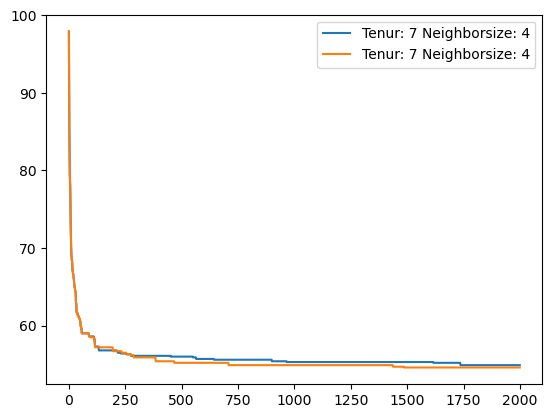

In [60]:

def computeCostwithGain(Iteration, tabooList, current, next):
    if(Iteration%30 == 0):
        tup = findupdate(current, next)
        penalty =  tabooList[tup[1]][tup[0]] * 5
    else:
        penalty = 0

    if(computeString(current) <= computeString(next)):
        return computeString(next)
    else:
        return computeString(next) +  penalty
    

def tabooSearchGraph4(MAX_ITERATION, generateNeighbor, current, computeCost, neighborlength, tenurlength, checktaboo, updatetaboo):
    tabooList = [[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0]]
    best_cost = computeCost(current)
    current_graph = current
    cost_history =[]
    

    for CURRENT_ITERATION in range(MAX_ITERATION):
        cost_history.append(best_cost)

        neighbor = generateNeighbor(current_graph, neighborlength)  #return set of neighbors
        neighbor.sort(key = lambda x: computeCostwithGain(CURRENT_ITERATION, tabooList, current_graph, x), reverse = False)
        
        for graph in neighbor:
            
            
            #print("---")
            #print(f"Current iteration {CURRENT_ITERATION}")
            #print(f"Taboo list {tabooList}")
            #print(f"{current_graph} vs {graph} ")
            #print(f"taboomove {CURRENT_ITERATION <tabooList[tabookey]}   value {computeCost(current_graph, EdgeCost)} vs {computeCost(graph, EdgeCost)}  currentbest {best_cost}")
            #print("tabookey ", tabookey)
            tup = findupdate(current_graph, graph)
            
           
            if checktaboo(tabooList, current_graph, graph) : #is taboo
                if(computeCost(graph) < best_cost):
    
                    current_graph = graph

                    tabooList[tup[1]][tup[0]] = tabooList[tup[1]][tup[0]] + 1
                    break
            else:
                updatetaboo(tabooList, current_graph, graph, tenurlength)
                current_graph = graph
                tabooList[tup[1]][tup[0]] = tabooList[tup[1]][tup[0]] + 1

                break
    


        for row in range(len(tabooList)):
            for col in range(row + 1 , len(tabooList[0])):
                if tabooList[row][col] != 0:
                    tabooList[row][col] = tabooList[row][col] - 1

        if best_cost > computeCost(current_graph):
            
            best_cost = computeCost(current_graph)

        
    return cost_history

def constructpathString():
    start  = list("xaghcbidef")
    random.shuffle(start)
    return start


def runSimulationP4(TRIAL, ITERATION, Neighborsize, Tenurlen, updatetaboo):
    trialsOfIteration = []
    for i in range(TRIAL):
        random.seed(i)

        start = constructpathString()
        trialsOfIteration.append(  tabooSearchGraph4(ITERATION, geneighbor, start, computeString, Neighborsize, Tenurlen, checktaboo, updatetaboo )         )

    avg = getAvg(trialsOfIteration)
    print("setting: "+ "NBsize, TNeurlen: " + str(Neighborsize) + " " + str(Tenurlen))
    print("Minimum: " + str(getMinimum(trialsOfIteration)))
    print("Average: " + str(avg[len(avg) - 1]))
    plt.plot(range(0,ITERATION), avg, label = "Tenur: " + str(Tenurlen) + " Neighborsize: "+str(Neighborsize ) )





runSimulationP3(10, 2000, 4, 7 ,updatetabooLASTSWAP)
runSimulationP4(10, 2000, 4, 7 ,updatetabooLASTSWAP)

plt.legend()
plt.show()


(42, [[1, 1, 1, 0, 0, 0, 1, 0], [1, 1, 1, 1, 0, 0, 0, 0], [1, 1, 1, 0, 0, 1, 0, 1], [1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 0, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0, 0, 0], [1, 1, 0, 0, 1, 1, 0, 1], [1, 0, 1, 1, 1, 1, 0, 0], [1, 1, 1, 0, 0, 1, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0], [0, 1, 1, 1, 1, 0, 0, 0], [1, 1, 0, 1, 0, 1, 0, 0], [0, 1, 1, 0, 0, 1, 1, 0], [1, 0, 1, 1, 1, 0, 0, 1], [1, 1, 1, 0, 0, 0, 0, 1], [1, 1, 0, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 0, 1, 1], [1, 0, 1, 1, 0, 0, 1, 0], [0, 1, 1, 1, 0, 1, 0, 0], [0, 1, 0, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1, 1, 1], [1, 1, 0, 1, 0, 0, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 1, 0, 0], [0, 1, 1, 0, 0, 0, 1, 1], [0, 1, 0, 0, 1, 1, 1, 0], [1, 0, 1, 1, 0, 1, 0, 1], [1, 0, 0, 1, 0, 1, 1, 1], [1, 1, 0, 0, 1, 0, 0, 1], [1, 0, 1, 1, 1, 0, 0, 0], [1, 0, 0, 1, 1, 0, 1, 0], [0, 1, 1, 1, 0, 0, 0, 1], [0, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 1, 0, 0, 1, 1], [1, 0, 1, 0, 1, 1, 0, 1], [1, 0, 0, 0, 1, 1, 1, 1], [1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 0, 0, 0, 0, 1, 0], [1, 0,

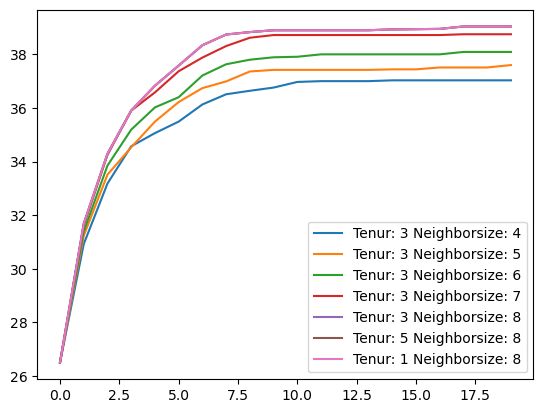

In [84]:
import random
import matplotlib.pyplot as plt
import statistics
def computeKnapsackCost(currentEdges):
    valuelist = [10,14,9,8,7,5,9,3]
    sum = 0
    for i in range(len(currentEdges)):
        if currentEdges[i] == 1:
            sum += valuelist[i]
    return sum 

def passweighttest(currentEdges):
    weightlist = [7, 12, 8, 9,8 ,6 , 11 ,5]
    sum = 0
    for i in range(len(currentEdges)):
        if currentEdges[i] == 1:
            sum += weightlist[i]
    return sum <= 38

def zeroIndexsList(currentEdges):
    ret = []
    for i in range(len(currentEdges)):
        if currentEdges[i] == 0:
            ret.append(i)
    return ret

def nonzeroIndexList(currentEdges):
    ret = []
    for i in range(len(currentEdges)):
        if currentEdges[i] != 0:
            ret.append(i)
    return ret

def knapsackNeighbor(currentEdges, neighborlen):
    
    hardcap = 20

    ret_list = []
    while(len(ret_list) < neighborlen):
      
        count = 0
        if count > hardcap:
                break
        
        tempedges = currentEdges.copy()
        remove_or_add = random.randint(0,1)
        if remove_or_add == 0: #removeedge
            NONZERO = nonzeroIndexList(currentEdges)
            if len(NONZERO) == 0:
                count = count +1
                continue
            tempedges[NONZERO[random.randint(0, len(NONZERO) - 1)]] = 0

            ret_list.append(tempedges)
            
        else:
            ZERO = zeroIndexsList(currentEdges)
            if len(ZERO) == 0:
                count = count +1
                continue
            previousRandom = ZERO[random.randint(0, len(ZERO) - 1)]
            tempedges[previousRandom] = 1
            while(passweighttest(tempedges)):
                count = count +1

                if count > hardcap:
                    break

                tempedges[previousRandom] = 0
                previousRandom = ZERO[random.randint(0, len(ZERO) - 1)]
                tempedges[previousRandom] = 1

            if(passweighttest(tempedges)):
                ret_list.append(tempedges)

        count = count +1
    return ret_list


def optimal_solution():
    def AllNeighbor(currentEdges):
        ret_list = []
        NONZERO = nonzeroIndexList(currentEdges)
        ZERO = zeroIndexsList(currentEdges)

        for i in range(len(NONZERO)):
            tempEdge = currentEdges.copy()
            tempEdge[NONZERO[i]] = 0
            ret_list.append(tempEdge)

        for i in range(len(ZERO)):
            tempEdge = currentEdges.copy()
            tempEdge[ZERO[i]] = 1
            if(passweighttest(tempEdge)):
                ret_list.append(tempEdge)
            else:
                continue
        return ret_list
    def edgeExist(edge, edgelist):
        for i in edgelist:
            if i == edge:
                return True 
        return False
    start = [0,0,0,0,0,0,0,0]
    allpossible = list()
    prevlength = 0
    
    
    allneighbor = AllNeighbor(start)

    for i in allneighbor:
        allpossible.append(i)
    
    currentlength = len(allpossible)
    
    while prevlength != currentlength:

        templist = list()
    

        for i in allpossible:
            
            allneighbor = AllNeighbor(i)
            for x in allneighbor:
                templist.append(x)

    
        for i in templist:
            if(edgeExist(i, allpossible) == False):
                allpossible.append(i)

        prevlength = currentlength
        currentlength = len(allpossible)

        

    allpossiblelist = list(allpossible)
    allpossiblelist.sort(key = lambda x:  computeKnapsackCost(x), reverse = True)
    
    return (computeKnapsackCost(allpossiblelist[0]), allpossiblelist)




print(optimal_solution())


def touchedEdge(current, next):
    for i in range(len(current)):
        if current[i] != next[i]:
            return i

def knapsackTaboosearch(ITERATION, tenurLength, neighborLength, computeCost):
    tabooList = [0,0,0,0,0,0,0,0]
    all_possible = optimal_solution()[1] 
    startpoint = all_possible[random.randint(0, len(all_possible)-1)]
    bestcost = computeCost(startpoint)
    
    
    current_graph = startpoint

    costHistory = []

    for i in range(ITERATION):

        costHistory.append(bestcost)

        neighbor = knapsackNeighbor(current_graph, neighborLength)  #return set of neighbors
        neighbor.sort(key = lambda x:  computeKnapsackCost(x), reverse = True)
       

        for graph in neighbor:
            touched_edge = touchedEdge(current_graph, graph)
            if(ITERATION < tabooList[touched_edge] ):
                if computeKnapsackCost(graph) > bestcost:
                    current_graph = graph
                    break
            else:
                current_graph = graph 
                tabooList[touched_edge] = ITERATION + tenurLength
                break

        if(bestcost < computeKnapsackCost(current_graph)):
            bestcost = computeKnapsackCost(current_graph)

    return costHistory


def getAvg(ListofList): 
    ReturnList = []
    for iteration in range(len(ListofList[0])):
        total = 0
        for trial in range(len(ListofList)):
            total += ListofList[trial][iteration]
        ReturnList.append(total/ len(ListofList))
    return ReturnList

def getMinimum(ListofList):
    minnest = 99999999
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] < minnest:
            minnest = ListofList[i][len(ListofList[0])-1]
            
    return minnest
def getMaximum(ListofList):
    mannest = -121213
    for i in range(len(ListofList)):
        if ListofList[i][len(ListofList[0])-1] > mannest:
            mannest = ListofList[i][len(ListofList[0])-1]
            
    return mannest

def getList(ListofList):
    arr = []
    for i in ListofList:
        arr.append(i[len(i)-1])
    return arr

def knapSacksim(trial,iteration, tenurlength, neighborLength):
    temp = []
    for i in range(trial):
        random.seed(i)
        temp.append(knapsackTaboosearch(iteration, tenurlength, neighborLength, computeKnapsackCost))
        
    avg = getAvg(temp)
    getList(temp)
    print("-----")
    print(getMinimum(temp))
    print(getMaximum(temp))

    print(statistics.stdev(getList(temp)))
    plt.plot(range(0,iteration), avg, label = "Tenur: " + str(tenurlength) + " Neighborsize: "+str(neighborLength) )
    


knapSacksim(100, 20, 3,4)
knapSacksim(100, 20, 3,5)
knapSacksim(100, 20, 3,6)
knapSacksim(100, 20, 3,7)    
knapSacksim(100, 20, 3,8)      
knapSacksim(100, 20, 5,8)  
knapSacksim(100, 20, 1,8)  

plt.legend()
plt.show()

        
    




In [66]:
knapsackNeighbor([0, 0, 0, 0, 0, 0, 1, 1],1)

[[0, 0, 0, 0, 0, 0, 1, 0]]